In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

### Read file 

In [65]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [66]:
data = data.drop(['Sex','RestingECG','ST_Slope','ExerciseAngina','ChestPainType'],axis=1)

### Exploratory Data Analysis


In [67]:
pd.set_option('display.float',"{:.2f}".format)
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


<AxesSubplot:>

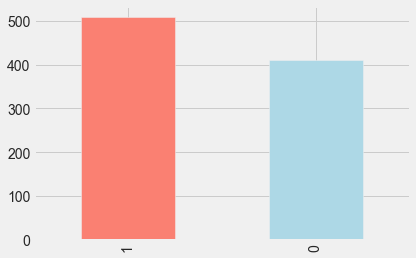

In [68]:
data.HeartDisease.value_counts().plot(kind='bar',color=['salmon','lightblue'])


In [69]:
# missing values
data.isnull().sum()

Age             0
RestingBP       0
Cholesterol     0
FastingBS       0
MaxHR           0
Oldpeak         0
HeartDisease    0
dtype: int64

In [70]:
catagorical_val=[]
continuous_val=[]
for column in data.columns:
    print('================================================')
    print(f'{column}:{data[column].unique()}')
    if len(data[column].unique())<=10:
        catagorical_val.append(column) 
    else:
        continuous_val.append(column)

Age:[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
RestingBP:[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol:[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132 226 217 303

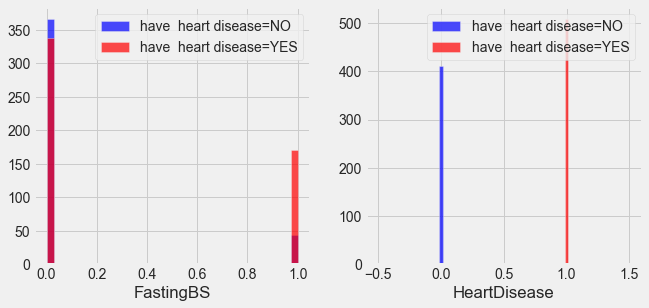

In [71]:
plt.figure(figsize = (15,15))
for i , column in enumerate(catagorical_val,1):
    plt.subplot(3,3,i)
    data[data['HeartDisease'] == 0][column].hist(bins = 35,color = 'blue',label = 'have  heart disease=NO',alpha = 0.7)
    data[data['HeartDisease'] == 1][column].hist(bins = 35,color = 'red',label = 'have  heart disease=YES',alpha = 0.7)
    plt.legend()
    plt.xlabel(column)

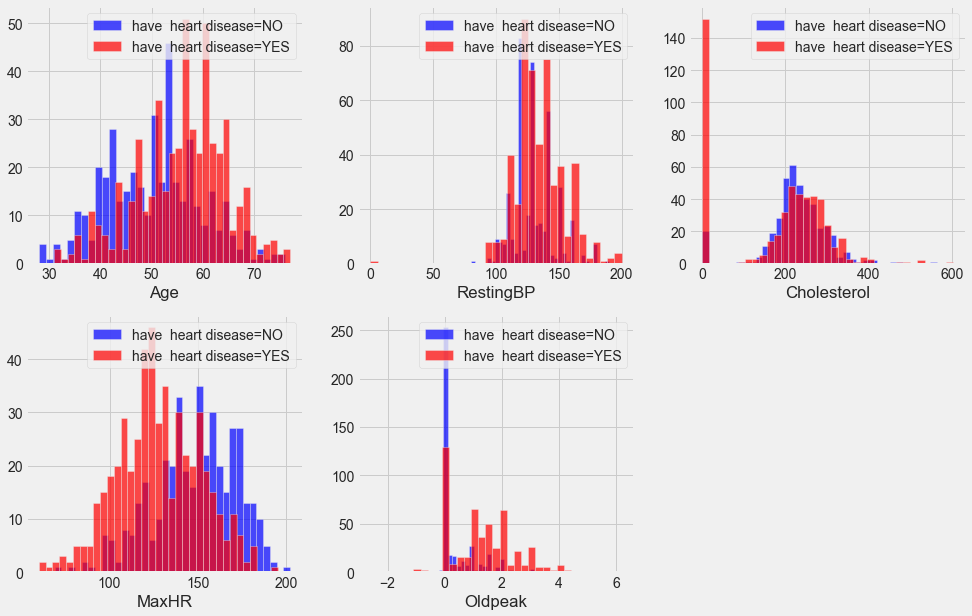

In [72]:
plt.figure(figsize = (15,15))
for i , column in enumerate(continuous_val,1):
    plt.subplot(3,3,i)
    data[data['HeartDisease'] == 0][column].hist(bins = 35,color = 'blue',label = 'have  heart disease=NO',alpha = 0.7)
    data[data['HeartDisease'] == 1][column].hist(bins = 35,color = 'red',label = 'have  heart disease=YES',alpha = 0.7)
    plt.legend()
    plt.xlabel(column)

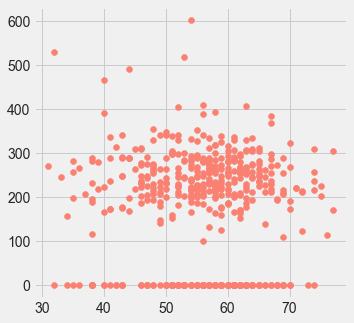

In [73]:
# create another figure 
plt.figure(figsize=(5,5))
# scatter with positive examples
plt.scatter(data.Age[data.HeartDisease==1],
           data.Cholesterol[data.HeartDisease==1],
            c="salmon")

(7.5, -0.5)

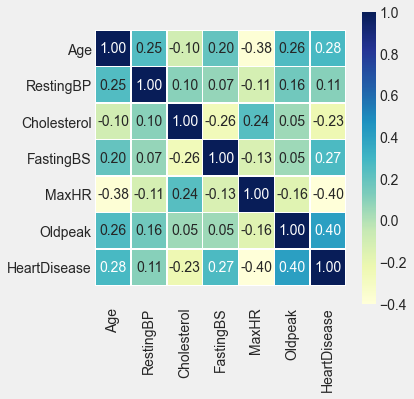

In [74]:
# correlation  matrix 
corr_matrix=data.corr()
fig,axes=plt.subplots(figsize=(5,5))
axes=sns.heatmap(corr_matrix,
             annot=True,
             linewidths=0.5,
             fmt='.2f',
             cmap="YlGnBu");
bottom,top=axes.get_ylim()
axes.set_ylim(bottom +0.5,top-0.5)

In [75]:
#  applying logistic regression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [76]:
def print_score(clf,X_train,y_train,X_test,y_test,train=True):
    if train:
        pred=clf.predict(X_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print('Train result: /n==============================================')
        print(f'Accuracy report : /n {accuracy_score(y_train,pred)*100:.2f}%')
        print('_________________________________________________________')
        print(f'classification report /n {clf_report}')
        print('_________________________________________________________')
        print(f'confusion matrix /n {confusion_matrix(y_train,pred)}')
    elif train==False:
        pred=clf.predict(X_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print('Test result: /n==============================================')
        print(f'Accuracy report : /n {accuracy_score(y_test,pred)*100:.2f}%')
        print('_________________________________________________________')
        print(f'classification report /n {clf_report}')
        print('_________________________________________________________')
        print(f'confusion matrix /n {confusion_matrix(y_test,pred)}')

In [77]:
# spplitting data into training and testing sets 
from sklearn.model_selection import train_test_split
X = data.drop('HeartDisease', axis=1)
y = data.HeartDisease
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)


LogisticRegression(solver='liblinear')

In [79]:
test_score=accuracy_score(y_test,lr_clf.predict(X_test))*100
train_score=accuracy_score(y_train,lr_clf.predict(X_train))*100
result_data=pd.DataFrame(data=[['Logistic Regression',train_score,test_score]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

In [80]:
result_data

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,77.10,76.81
